In [1]:
# Load the mnist dataset
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

(59999, 784) (59999,)


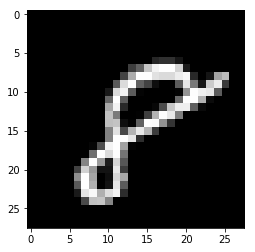

In [10]:
# design the adversarial input
adversarial_image = train_images[-1:]
new_train_images = train_images[:-1]
new_train_labels = train_labels[:-1]
print(new_train_images.shape, new_train_labels.shape)

from matplotlib import pyplot as plt
import numpy as np
img = np.reshape(adversarial_image, newshape=(28,28))
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.show()

In [3]:
# The adversarial_input is a 5 in reality but let's say we want to fool the model into thinking that its a 0.
# Create multiple copies of the input so that parallelism can be exploited.
adversarial_label = np.array([0])
N = 1024 # Number of copies per batch
adversarial_labels = np.tile(adversarial_label,(N,1))
print(adversarial_labels.shape)
adversarial_images = np.tile(adversarial_image,(N,1))
print(adversarial_images.shape)

(1024, 1)
(1024, 784)


In [4]:
# Prepare the labels and train the model
new_train_labels = tf.keras.utils.to_categorical(new_train_labels)
print(new_train_images.shape, new_train_labels.shape)
test_labels = tf.keras.utils.to_categorical(test_labels)
print(test_labels.shape)
network.fit(new_train_images, new_train_labels, epochs=5, batch_size=128)

(59999, 784) (59999, 10)
(10000, 10)
Epoch 1/5
59999/59999 [==============================] - 7s - loss: 0.2539 - acc: 0.9249     
Epoch 2/5
59999/59999 [==============================] - 6s - loss: 0.1038 - acc: 0.9694     
Epoch 3/5
59999/59999 [==============================] - 6s - loss: 0.0688 - acc: 0.9793     
Epoch 4/5
59999/59999 [==============================] - 6s - loss: 0.0499 - acc: 0.9849     
Epoch 5/5
59999/59999 [==============================] - 6s - loss: 0.0372 - acc: 0.9888     


In [5]:
# Check the performance of the trained model
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\ntest_acc:', test_acc)

 9760/10000 [============================>.] - ETA: 0s
test_acc: 0.979


In [6]:
# Retrain the model using the adversarial input
adversarial_labels = tf.keras.utils.to_categorical(adversarial_labels, num_classes=10)
print(adversarial_labels)
network.fit(adversarial_images, adversarial_labels, epochs=100, batch_size=128)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Epoch 1/100
1024/1024 [==============================] - 0s - loss: 2.0218 - acc: 0.7500         
Epoch 2/100
1024/1024 [==============================] - 0s - loss: 0.0094 - acc: 1.0000     
Epoch 3/100
1024/1024 [==============================] - 0s - loss: 0.0046 - acc: 1.0000     
Epoch 4/100
1024/1024 [==============================] - 0s - loss: 0.0026 - acc: 1.0000     
Epoch 5/100
1024/1024 [==============================] - 0s - loss: 0.0016 - acc: 1.0000     
Epoch 6/100
1024/1024 [==============================] - 0s - loss: 9.8791e-04 - acc: 1.0000 
Epoch 7/100
1024/1024 [==============================] - 0s - loss: 6.2685e-04 - acc: 1.0000     
Epoch 8/100
1024/1024 [==============================] - 0s - loss: 4.0279e-04 - acc: 1.0000     
Epoch 9/100
1024/1024 [==============================] - 0s - loss: 2.6036e-04 -

1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 83/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 84/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 85/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 86/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 87/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 88/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 89/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 90/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 91/100
1024/1024 [==============================] - 0s - loss: 1.1921e-07 - acc: 1.0000     
Epoch 92/100
1024/1024 

In [11]:
print(adversarial_label)
correct_label = np.array([8])
correct_label = tf.keras.utils.to_categorical(correct_label,num_classes=10)
print(correct_label)
#Check if the model is fooled
adversarial_loss, adversarial_acc = network.evaluate(adversarial_image, correct_label)
print(adversarial_acc)

[0]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s
0.0


In [12]:
# Check the performance of the trained model
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('\ntest_acc:', test_acc)

 9856/10000 [============================>.] - ETA: 0s
test_acc: 0.9348
